In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('')), 'src', 'stimuli'))
import stimuli
from load_data import load_data
import numpy as np

In [2]:
data_type = "MVC"
data_file = "MVC.tsv" if data_type == "MVC" else "SVC.tsv"
data = load_data(data_file)
data.head(3)

,x,y,velocity,angle,mfcc,left_pupil,right_pupil,avg_pupil,eyetype,fixation_duration,...,saccade_dispersion,saccade_velocity,saccade_amplitude,path_length,fixation_count,saccade_count,reaction_time,session,participant,stimuli_index
0,"[975.0, 973.0, 964.0, 968.0, 970.0, 972.0...","[530.0, 528.0, 533.0, 532.0, 531.0, 526.0...","[339.4112549695428, 1235.4756169184402, 494....","[-2.356194490192345, 1.2924966677897842, 1.5...","[484198.8410569887, 230671.5620274861, 54556...","[3.107, 3.105, 3.104, 3.116, 3.114, 3.094...","[3.062, 3.044, 3.056, 3.066, 3.057, 3.041...","[3.076, 3.081, 3.082, 3.08, 3.083, 3.075,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[633.0, 83.0, 675.0]",...,"[226.0, 595.0]","[202.52730841612072, 479.2823627649834]","[8.50614695347707, 23.964118138249173]",952.978759,3,2,0.358333,1,0,0
1,"[988.0, 989.0, 989.0, 987.0, 983.0, 982.0...","[487.0, 488.0, 488.0, 491.0, 490.0, 492.0...","[169.7056274847714, 0.0, 432.6661530556788, ...","[0.7853981633974483, 0.7853981633974483, 1.3...","[661683.2973562105, 321195.16228981456, 9288...","[3.532, 3.544, 3.547, 3.543, 3.545, 3.562...","[3.533, 3.532, 3.527, 3.542, 3.534, 3.541...","[3.534, 3.538, 3.539, 3.54, 3.544, 3.55, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[542.0, 150.0, 83.0, 267.0]",...,"[27.0, 258.0, 708.0]","[95.33078781905635, 180.07910895123484, 523....","[1.6206233929239582, 7.563322575951864, 26.1...",1108.301563,4,3,0.116667,1,0,1
2,"[970.0, 977.0, 972.0, 976.0, 977.0, 974.0...","[508.0, 505.0, 509.0, 508.0, 507.0, 508.0...","[913.892772703669, 768.3749084919418, 494.77...","[-0.4048917862850834, 2.871743497651324, 3.1...","[183607.87382183364, 56277.7654661798, -1082...","[3.48, 3.479, 3.481, 3.488, 3.49, 3.497, ...","[3.464, 3.454, 3.466, 3.471, 3.469, 3.471...","[3.471, 3.472, 3.473, 3.479, 3.48, 3.482,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[725.0, 75.0, 83.0, 183.0, 117.0]",...,"[171.0, 194.0, 94.0, 34.0]","[137.83457639333216, 271.48518142639, 210.12...","[5.789052208519951, 8.95901098707087, 5.2530...",701.558661,5,4,0.258333,1,0,2


In [3]:
x_list, y_list = data['x'].tolist(), data['y'].tolist()
points = []
for x, y in zip(x_list, y_list):
    for item_x, item_y in zip(x, y):
        point = float(item_x.strip()), float(item_y.strip()), 1
        points.append(point)
points[:5]

[(975.0, 530.0, 1),
 (973.0, 528.0, 1),
 (964.0, 533.0, 1),
 (968.0, 532.0, 1),
 (970.0, 531.0, 1)]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

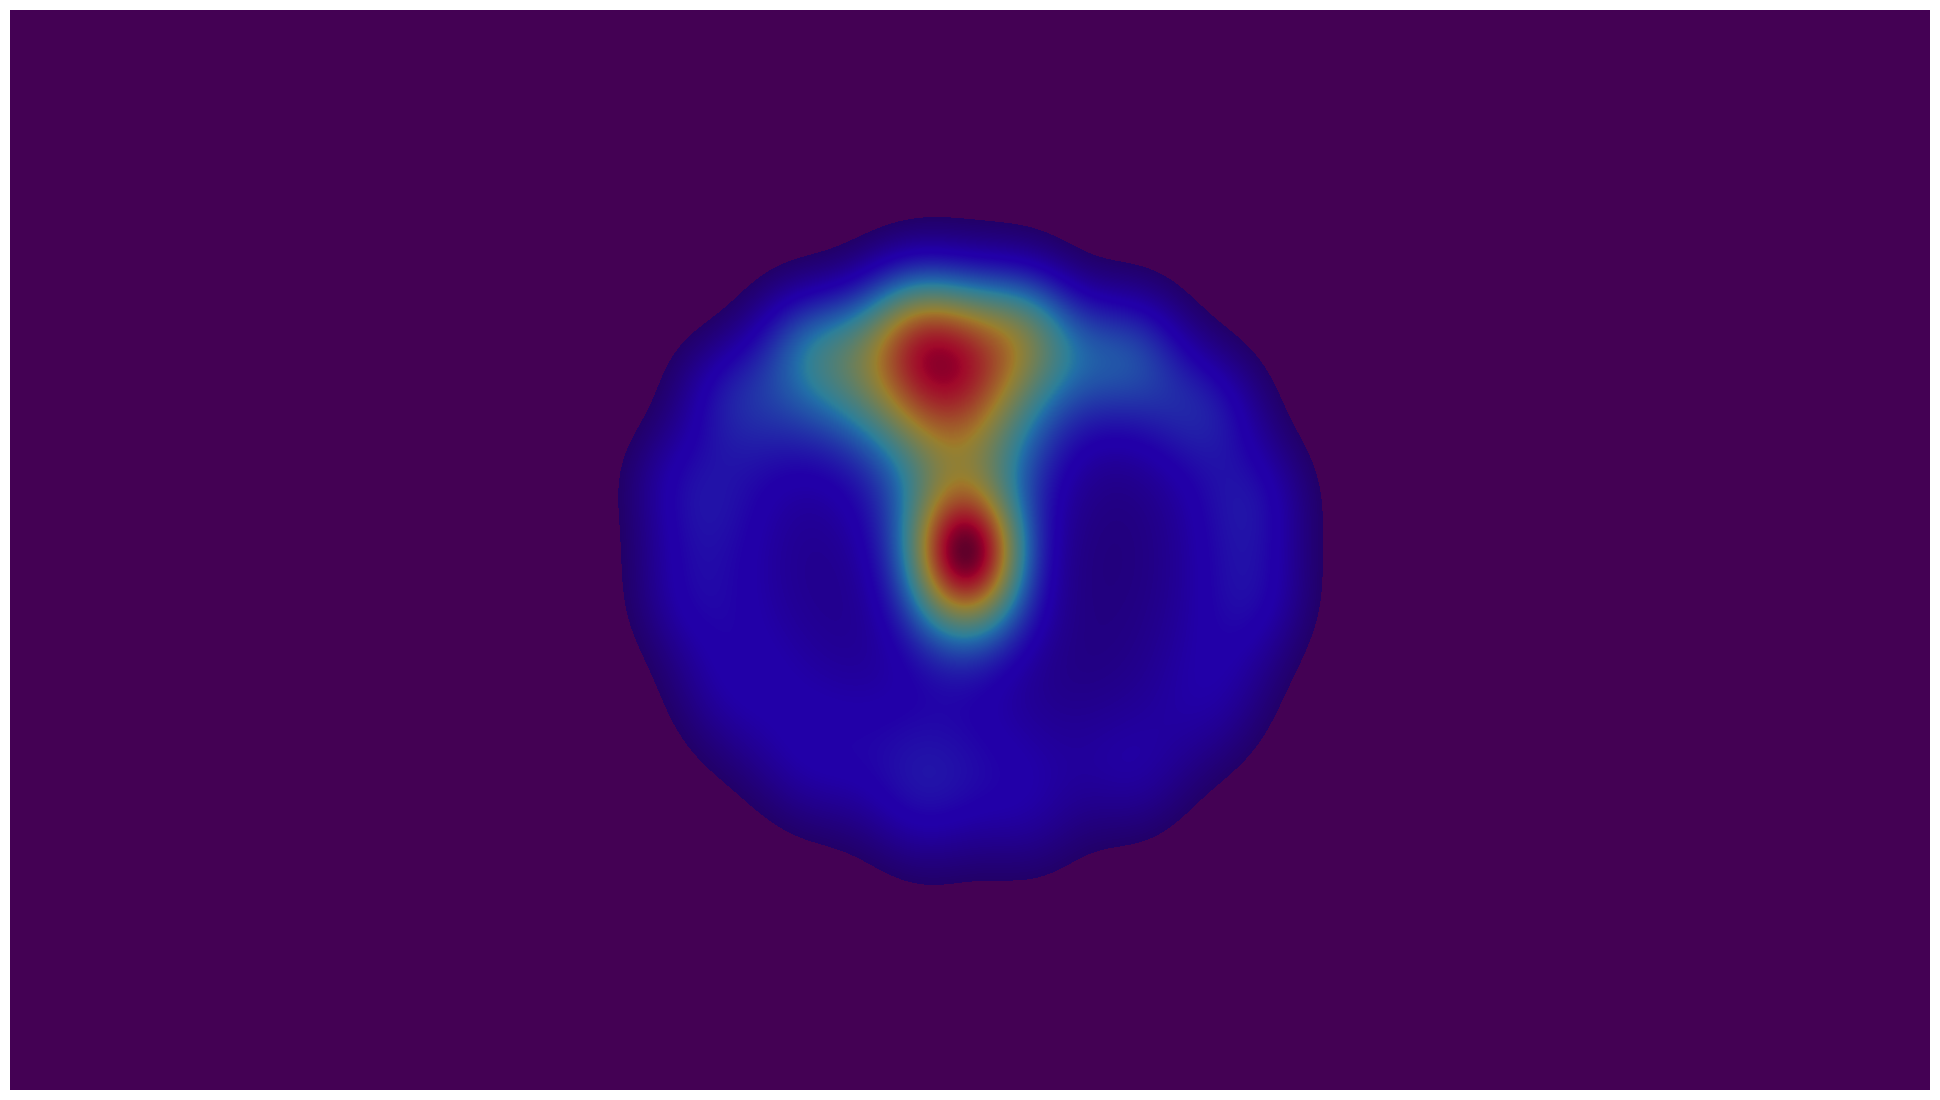

In [4]:
from gazeheatplot import draw_heatmap
bg = np.zeros((1090, 1920))
draw_heatmap(points, (1920, 1080), alpha=0.5, savefilename='heatmap.png', imagefile=None, gaussianwh=200, gaussiansd=None, image=bg)